In [1]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt
import os

In [2]:
total_path = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/data/"
nms = os.listdir(total_path + "boss")
cata_files = []
cata_name = []
gal_num = []
for nm in nms:
    if "galaxy" in nm:
        cata_files.append(nm)
        cata_name.append(nm.split(".fits")[0][14:])
cata_num = len(cata_name)

In [3]:
for tag, nm in enumerate(cata_name):
    print("%d, %20s,  %50s"%(tag,  cata_name[tag],cata_files[tag]))

0,    CMASSLOWZE2_North,             galaxy_DR12v5_CMASSLOWZE2_North.fits.gz
1,    CMASSLOWZE3_North,             galaxy_DR12v5_CMASSLOWZE3_North.fits.gz
2,      CMASSLOWZ_North,               galaxy_DR12v5_CMASSLOWZ_North.fits.gz
3,      CMASSLOWZ_South,               galaxy_DR12v5_CMASSLOWZ_South.fits.gz
4,   CMASSLOWZTOT_North,            galaxy_DR12v5_CMASSLOWZTOT_North.fits.gz
5,   CMASSLOWZTOT_South,            galaxy_DR12v5_CMASSLOWZTOT_South.fits.gz
6,          CMASS_North,                   galaxy_DR12v5_CMASS_North.fits.gz
7,          CMASS_South,                   galaxy_DR12v5_CMASS_South.fits.gz
8,           LOWZ_North,                    galaxy_DR12v5_LOWZ_North.fits.gz
9,           LOWZ_South,                    galaxy_DR12v5_LOWZ_South.fits.gz


In [4]:
datas = [fits.open(total_path + "boss/%s"%cata_files[i])[1].data for i in range(cata_num)]

In [5]:
for i in range(cata_num):
    gal_num.append(datas[i].shape[0])
    print(datas[i].shape, datas[i]["Z"].min(), datas[i]["Z"].max(), cata_name[i])

(799762,) -0.0114469 1.00217 CMASSLOWZE2_North
(753621,) -0.0114469 1.00217 CMASSLOWZE3_North
(850364,) -0.0114469 1.00217 CMASSLOWZ_North
(372601,) -0.000379807 1.13659 CMASSLOWZ_South
(953255,) -0.0114469 1.00217 CMASSLOWZTOT_North
(372601,) -0.000379807 1.13659 CMASSLOWZTOT_South
(618806,) -0.0114469 1.00217 CMASS_North
(230831,) -0.000379807 1.13659 CMASS_South
(317780,) -0.000121463 0.987233 LOWZ_North
(145264,) -0.000210571 0.997976 LOWZ_South


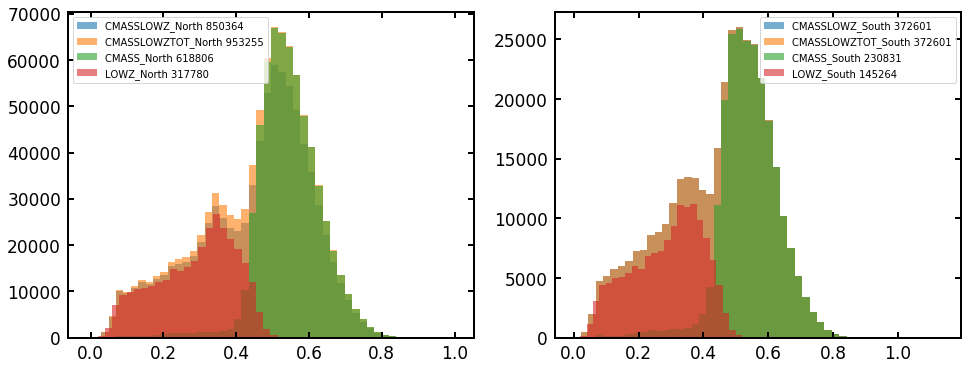

In [6]:
img = Image_Plot()
img.create_subfig(1,2)
sc = 0
nc = 0
for i in range(cata_num):
    if "CMASSLOWZE" not in cata_name[i]:
        if "North" in cata_name[i]:
            img.axs[0][0].hist(datas[i]["Z"], 50,alpha=0.6, color="C%d"%nc, label=cata_name[i] + " %d"%gal_num[i])
            nc+=1
        else:
            img.axs[0][1].hist(datas[i]["Z"], 50, alpha=0.6,color="C%d"%sc, label=cata_name[i] + " %d"%gal_num[i])
            sc +=1
img.axs[0][0].legend()
img.axs[0][1].legend()
img.show_img()

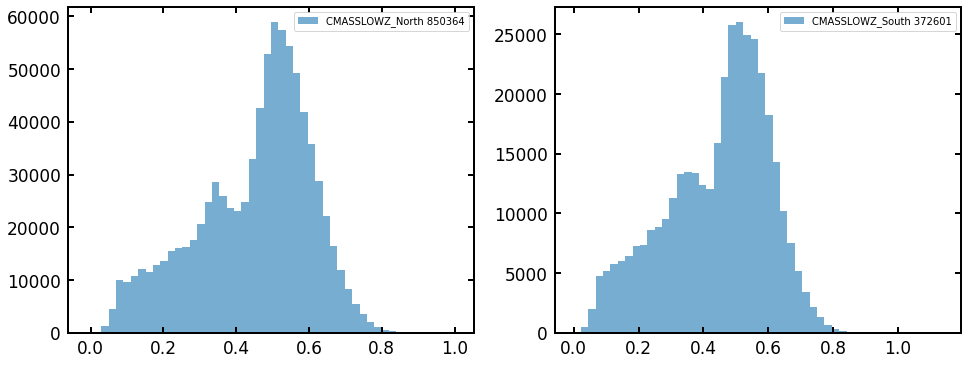

In [7]:
img = Image_Plot()
img.create_subfig(1,2)
sc = 0
nc = 0
for i in range(cata_num):
    if "CMASSLOWZ_" in cata_name[i]:
        if "North" in cata_name[i]:
            img.axs[0][0].hist(datas[i]["Z"], 50,alpha=0.6, color="C%d"%nc, label=cata_name[i] + " %d"%gal_num[i])
            nc+=1
        else:
            img.axs[0][1].hist(datas[i]["Z"], 50, alpha=0.6,color="C%d"%sc, label=cata_name[i] + " %d"%gal_num[i])
            sc +=1
img.axs[0][0].legend()
img.axs[0][1].legend()
img.show_img()

In [9]:
# The foreground catalog of CMASS_LOWZ

# LOWZ
lowz_ra_n = datas[8]["RA"]
lowz_dec_n = datas[8]["DEC"]
lowz_z_n = datas[8]["Z"]

lowz_ra_s = datas[9]["RA"]
lowz_dec_s = datas[9]["DEC"]
lowz_z_s = datas[9]["Z"]

num_n = lowz_ra_n.shape[0]
num_s = lowz_ra_s.shape[0]

lowz_ra = numpy.zeros((num_n+num_s, ))
lowz_dec = numpy.zeros((num_n+num_s, ))
lowz_z = numpy.zeros((num_n+num_s, ))

lowz_ra[:num_n] = lowz_ra_n
lowz_ra[num_n:] = lowz_ra_s

lowz_dec[:num_n] = lowz_dec_n
lowz_dec[num_n:] = lowz_dec_s

lowz_z[:num_n] = lowz_z_n
lowz_z[num_n:] = lowz_z_s

h5f = h5py.File(total_path + "foreground/lowz.hdf5","w")
h5f["/RA"] = lowz_ra
h5f["/DEC"] = lowz_dec
h5f["/COS_DEC"] = numpy.abs(numpy.cos(lowz_dec/180*numpy.pi))
h5f["/Z"] = lowz_z

h5f["/RA"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/DEC"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/COS_DEC"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/Z"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)

h5f["/RA_NORTH"] = lowz_ra_n
h5f["/DEC_NORTH"] = lowz_dec_n
h5f["/Z_NORTH"] = lowz_z_n

h5f["/RA_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)
h5f["/DEC_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)
h5f["/Z_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)

h5f["/RA_SOUTH"] = lowz_ra_s
h5f["/DEC_SOUTH"] = lowz_dec_s
h5f["/Z_SOUTH"] = lowz_z_s

h5f["/RA_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f["/DEC_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f["/Z_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f.close()



# CMASS
cmass_ra_n = datas[6]["RA"]
cmass_dec_n = datas[6]["DEC"]
cmass_z_n = datas[6]["Z"]

cmass_ra_s = datas[7]["RA"]
cmass_dec_s = datas[7]["DEC"]
cmass_z_s = datas[7]["Z"]

num_n = cmass_ra_n.shape[0]
num_s = cmass_ra_s.shape[0]

cmass_ra = numpy.zeros((num_n+num_s, ))
cmass_dec = numpy.zeros((num_n+num_s, ))
cmass_z = numpy.zeros((num_n+num_s, ))

cmass_ra[:num_n] = cmass_ra_n
cmass_ra[num_n:] =cmass_ra_s

cmass_dec[:num_n] = cmass_dec_n
cmass_dec[num_n:] = cmass_dec_s

cmass_z[:num_n] =cmass_z_n
cmass_z[num_n:] =cmass_z_s

h5f = h5py.File(total_path + "foreground/cmass.hdf5","w")
h5f["/RA"] = cmass_ra
h5f["/DEC"] = cmass_dec
h5f["/COS_DEC"] = numpy.abs(numpy.cos(cmass_dec/180*numpy.pi))
h5f["/Z"] = cmass_z

h5f["/RA"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/DEC"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/COS_DEC"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)
h5f["/Z"].attrs["shape"] = numpy.array([num_n+num_s, 1], dtype=numpy.intc)

h5f["/RA_NORTH"] = cmass_ra_n
h5f["/DEC_NORTH"] = cmass_dec_n
h5f["/Z_NORTH"] = cmass_z_n

h5f["/RA_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)
h5f["/DEC_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)
h5f["/Z_NORTH"].attrs["shape"] = numpy.array([num_n, 1], dtype=numpy.intc)

h5f["/RA_SOUTH"] = cmass_ra_s
h5f["/DEC_SOUTH"] = cmass_dec_s
h5f["/Z_SOUTH"] = cmass_z_s

h5f["/RA_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f["/DEC_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f["/Z_SOUTH"].attrs["shape"] = numpy.array([num_s, 1], dtype=numpy.intc)
h5f.close()

img = Image_Plot(fig_x=12,fig_y=9)
img.create_subfig(2,2)

img.axs[0][0].scatter(lowz_ra_n,lowz_dec_n, label="LOWZ North",s=3)
img.axs[0][0].scatter(lowz_ra_s,lowz_dec_s, label="LOWZ South",s=3)
img.axs[0][0].set_ylim(-30,90)
img.axs[0][0].set_xlim(0,360)
img.axs[0][0].set_xlabel("RA")
img.axs[0][0].set_ylabel("DEC")
img.axs[0][0].legend()

img.axs[0][1].hist(lowz_z_n,100, label="LOWZ North")
img.axs[0][1].hist(lowz_z_s, 100, label="LOWZ South")
img.axs[0][1].set_xlabel("Z")
img.axs[0][1].legend()

img.axs[1][0].scatter(cmass_ra_n,cmass_dec_n, label="CMASS North",s=3)
img.axs[1][0].scatter(cmass_ra_s,cmass_dec_s, label="CMASS South",s=3)
img.axs[1][0].set_ylim(-30,90)
img.axs[1][0].set_xlim(0,360)
img.axs[1][0].set_xlabel("RA")
img.axs[1][0].set_ylabel("DEC")
img.axs[1][0].legend()

img.axs[1][1].hist(cmass_z_n,100, label="CMASS North")
img.axs[1][1].hist(cmass_z_s, 100, label="CMASS South")
img.axs[1][1].set_xlabel("Z")
img.axs[1][1].legend()
img.save_img(total_path + "foreground/cmass_lowz.png")
plt.close()

In [13]:
# select the data in the overlap
h5f = h5py.File("/mnt/ddnfs/data_users/hkli/CFHT/catalog/cfht_cata/cata.hdf5","r")
content = ["# ra_min, ra_max, dec_min, dec_max\n"]
nc = 0
nl = 0
for i in range(1,5):
    data = h5f["/w_%d"%i].value
    cfht_ra = data[:,0]
    cfht_dec = data[:,1]
    
    ra_min, ra_max = cfht_ra.min(), cfht_ra.max()
    dec_min, dec_max = cfht_dec.min(), cfht_dec.max()  

    content.append("%f, %f,%f, %f\n"%(ra_min, ra_max,dec_min, dec_max))
    
#     cmass
    h5f_cmass = h5py.File(total_path + "foreground/cmass/w_%d.hdf5"%i,"w")
    idx_1 = cmass_ra >= ra_min
    idx_2 = cmass_ra <= ra_max
    idx_3 = cmass_dec >= dec_min
    idx_4 = cmass_dec <= dec_max
    idx_5 = cmass_z >= 0.43
    idx_6 = cmass_z <= 0.7
    idx = idx_1 & idx_2 & idx_3 & idx_4 & idx_5 & idx_6
    num = idx.sum()
    nc += num
    print("CMASS", num)
    h5f_cmass["/RA"] = cmass_ra[idx]
#     h5f_cmass["/RA"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_cmass["/DEC"] = cmass_dec[idx]
#     h5f_cmass["/DEC"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_cmass["/COS_DEC"] = numpy.abs(numpy.cos(cmass_dec[idx]/180*numpy.pi))
#     h5f_cmass["/COS_DEC"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_cmass["/Z"] = cmass_z[idx]
#     h5f_cmass["/Z"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_cmass.close()
    
#     LOWZ
    h5f_lowz = h5py.File(total_path + "foreground/lowz/w_%d.hdf5"%i,"w")
    idx_1 = lowz_ra >= ra_min
    idx_2 = lowz_ra <= ra_max
    idx_3 = lowz_dec >= dec_min
    idx_4 = lowz_dec <= dec_max
    idx_5 = lowz_z >= 0.15
    idx_6 = lowz_z <= 0.43
    idx = idx_1 & idx_2 & idx_3 & idx_4 & idx_5 & idx_6
    num = idx.sum()
    nl += num
    print("LOWZ", num,"\n")
    h5f_lowz["/RA"] = lowz_ra[idx]
#     h5f_lowz["/RA"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_lowz["/DEC"] = lowz_dec[idx]
#     h5f_lowz["/DEC"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_lowz["/COS_DEC"] = numpy.abs(numpy.cos(lowz_dec[idx]/180*numpy.pi))
#     h5f_lowz["/COS_DEC"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_lowz["/Z"] = lowz_z[idx]
#     h5f_lowz["/Z"].attrs["shape"] = numpy.array([num, 1], dtype=numpy.intc)
    
    h5f_lowz.close()
    
print(nc, nl)
with open("/mnt/ddnfs/data_users/hkli/CFHT/catalog/cfht_cata/area_range.dat","w") as f:
    f.writelines(content)
h5f.close()

CMASS 3930
LOWZ 2063 

CMASS 196
LOWZ 0 

CMASS 4075
LOWZ 1797 

CMASS 2549
LOWZ 1225 

10750 5085


In [52]:
overlap_north = numpy.zeros((cata_num[8],))
for i in range(cata_num[8]):
    d_ra = numpy.abs(datas[8]["RA"][i] - datas[6]["RA"])
    d_dec = numpy.abs(datas[8]["DEC"][i] - datas[6]["DEC"])
    idx_ra = d_ra <= 0.0002
    idx_dec = d_dec <= 0.0002
    idx = idx_ra & idx_dec
    if idx.sum() > 0:
        overlap_north[i] = 1
        print("Overlap")

TypeError: 'int' object is not subscriptable